In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
from pylab import mpl, plt
import pandas_datareader as web

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

start = dt.datetime(2020,1,10)
end = dt.datetime(2020,3,28)
tickers = ['EGIE3.SA', 'KLBN11.SA', 'VIVT4.SA', 'WEGE3.SA', 'JBSS3.SA', 'LCAM3.SA', 'VVAR3.SA', 'MGLU3.SA', 'NTCO3.SA', 'PETR4.SA', '^BVSP']

database = pd.DataFrame()

for ticker in tickers:
    data = web.DataReader(ticker, 'yahoo', start, end)
    database['{}'.format(ticker)] = data['Adj Close']

c:\users\lucas\appdata\local\programs\python\python38-32\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
db_ret = pd.DataFrame()

for ticker in tickers:
    db_ret['{}'.format(ticker)] = np.log(database['{}'.format(ticker)]/database['{}'.format(ticker)].shift(1))
    db_ret.dropna(inplace=True)
    
db_ret.corr()

,EGIE3.SA,KLBN11.SA,VIVT4.SA,WEGE3.SA,JBSS3.SA,LCAM3.SA,VVAR3.SA,MGLU3.SA,NTCO3.SA,PETR4.SA,^BVSP
EGIE3.SA,1.000000,0.749647,0.770517,0.737867,0.888118,0.870458,0.811509,0.838049,0.725498,0.761621,0.889670
KLBN11.SA,0.749647,1.000000,0.684703,0.768365,0.687382,0.660287,0.664979,0.621165,0.560371,0.686367,0.753427
VIVT4.SA,0.770517,0.684703,1.000000,0.694562,0.726407,0.744431,0.715491,0.678803,0.540358,0.737804,0.762016
WEGE3.SA,0.737867,0.768365,0.694562,1.000000,0.768291,0.745641,0.775403,0.722898,0.661305,0.731187,0.805840
JBSS3.SA,0.888118,0.687382,0.726407,0.768291,1.000000,0.890800,0.867085,0.883989,0.770998,0.824583,0.921973
LCAM3.SA,0.870458,0.660287,0.744431,0.745641,0.890800,1.000000,0.874514,0.866562,0.818976,0.838134,0.919318
VVAR3.SA,0.811509,0.664979,0.715491,0.775403,0.867085,0.874514,1.000000,0.866713,0.790376,0.789985,0.879390
MGLU3.SA,0.838049,0.621165,0.678803,0.722898,0.883989,0.866562,0.866713,1.000000,0.843742,0.757024,0.902098
NTCO3.SA,0.725498,0.560371,0.540358,0.661305,0.770998,0.818976,0.790376,0.843742,1.000000,0.730188,0.865191
PETR4.SA,0.761621,0.686367,0.737804,0.731187,0.824583,0.838134,0.789985,0.757024,0.730188,1.000000,0.917369


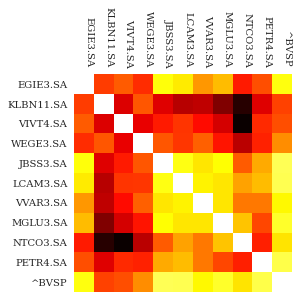

<Figure size 2880x1728 with 0 Axes>

In [12]:
fig, ax = plt.subplots()

plt.figure(figsize=(40,24))
ax.matshow(db_ret.corr(), cmap='hot')

ax.set_xticks(np.arange(len(tickers)))
ax.set_yticks(np.arange(len(tickers)))
ax.grid(False)
ax.set_xticklabels(tickers)
ax.set_yticklabels(tickers)
plt.setp(ax.get_xticklabels(), rotation=270, ha="right",
         rotation_mode="anchor")

plt.show()